### libraries

In [1]:
library(e1071)

Warning message:
"package 'e1071' was built under R version 4.2.3"


### load data

Training:

In [14]:
df_train <- read.csv("SVM_train.csv", header=TRUE)
df_train <- df_train[2:6]

df_train$Preferred <- factor(df_train$Preferred)

head(df_train)

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
,<int>,<int>,<dbl>,<dbl>,<fct>
1,76,70,0.9370117,0.9096775,1
2,61,3,0.8970217,0.8499501,0
3,59,34,0.7397579,0.7128710,1
4,49,5,0.5791564,0.5312315,0
5,72,50,0.9018998,0.9438479,0
6,64,59,0.9937029,0.9960812,1


Testing:

In [15]:
df_test <- read.csv("SVM_test.csv", header=TRUE)
df_test <- df_test[2:6]

df_test$Preferred <- factor(df_test$Preferred)

head(df_test)

,artistPop,trackPop,pref_dist6,pref_dist3,Preferred
,<int>,<int>,<dbl>,<dbl>,<fct>
1,31,6,0.7925409,0.7099879,0
2,60,59,0.9860911,0.9848305,1
3,38,7,0.9225591,0.9270121,1
4,79,67,1.0000000,1.0000000,1
5,38,43,0.9180438,0.9782298,1
6,72,35,0.8998447,0.9271644,1


### SVM with linear kernel

Experiment with cost = 0.001, 0.1, 1, 10, 50

Model: Preferred ~ artistPop + trackPop + pref_dist6

In [29]:
costs <- c(0.001, 0.1, 1, 10, 50)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='linear', cost=costs[i])
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc)

costs,train_acc,test_acc
<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45
1e-01,0.5525,0.55
1e+00,0.5500,0.55
1e+01,0.5450,0.53
5e+01,0.5450,0.53


Model: Preferred ~ artistPop + trackPop + pref_dist3

In [30]:
costs <- c(0.001, 0.1, 1, 10, 50)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='linear', cost=costs[i])
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc)

costs,train_acc,test_acc
<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45
1e-01,0.5375,0.53
1e+00,0.5500,0.51
1e+01,0.5500,0.51
5e+01,0.5500,0.51


Model: Preferred ~ artistPop + trackPop + pref_dist6 + pref_dist3

In [56]:
costs <- c(0.001, 0.1, 1, 10, 50)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='linear', cost=costs[i])
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc)

costs,train_acc,test_acc
<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45
1e-01,0.5500,0.59
1e+00,0.5800,0.56
1e+01,0.5850,0.57
5e+01,0.5850,0.57


In [57]:
linear_model <- svm(Preferred ~ ., data=df_train, kernel='linear', cost=0.1)
test_tbl <- table(df_test$Preferred, predict(linear_model, newdata=df_test))
test_tbl
sum(diag(test_tbl))/sum(test_tbl)

   
     0  1
  0 37  8
  1 33 22

[1] 0.59

### SVM with RBF kernel

Experiment with cost = 0.001, 0.1, 1, 10, 50, and gamma = 0.16, 0.33, 0.49

Model: Preferred ~ artistPop + trackPop + pref_dist6

In [64]:
costs <- c(0.001, 0.1, 1, 10, 50)
gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='radial', cost=costs[i], gamma=0.16)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='radial', cost=costs[i], gamma=0.33)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='radial', cost=costs[i], gamma=0.49)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16
1e-01,0.5225,0.47,0.16
1e+00,0.5975,0.54,0.16
1e+01,0.6150,0.47,0.16
5e+01,0.6250,0.44,0.16


costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33
1e-01,0.5300,0.46,0.33
1e+00,0.6175,0.45,0.33
1e+01,0.6650,0.47,0.33
5e+01,0.6775,0.49,0.33


costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49
1e-01,0.5150,0.43,0.49
1e+00,0.6300,0.48,0.49
1e+01,0.6850,0.50,0.49
5e+01,0.7100,0.43,0.49


Model: Preferred ~ artistPop + trackPop + pref_dist6 + pref_dist3

In [65]:
costs <- c(0.001, 0.1, 1, 10, 50)
gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='radial', cost=costs[i], gamma=0.16)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='radial', cost=costs[i], gamma=0.33)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='radial', cost=costs[i], gamma=0.49)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16
1e-01,0.5225,0.48,0.16
1e+00,0.5850,0.51,0.16
1e+01,0.6100,0.41,0.16
5e+01,0.6425,0.43,0.16


costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33
1e-01,0.5300,0.48,0.33
1e+00,0.5925,0.43,0.33
1e+01,0.6350,0.44,0.33
5e+01,0.6675,0.43,0.33


costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49
1e-01,0.5175,0.48,0.49
1e+00,0.6200,0.46,0.49
1e+01,0.6675,0.45,0.49
5e+01,0.7125,0.41,0.49


Model: Preferred ~ artistPop + trackPop + pref_dist6 + pref_dist3

In [66]:
costs <- c(0.001, 0.1, 1, 10, 50)
gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='radial', cost=costs[i], gamma=0.16)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='radial', cost=costs[i], gamma=0.33)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='radial', cost=costs[i], gamma=0.49)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma)

costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16
1e-01,0.5250,0.46,0.16
1e+00,0.5950,0.52,0.16
1e+01,0.6625,0.50,0.16
5e+01,0.6750,0.40,0.16


costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33
1e-01,0.5225,0.43,0.33
1e+00,0.6450,0.46,0.33
1e+01,0.7025,0.47,0.33
5e+01,0.7275,0.42,0.33


costs,train_acc,test_acc,gamma
<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49
1e-01,0.5175,0.43,0.49
1e+00,0.6450,0.48,0.49
1e+01,0.7275,0.42,0.49
5e+01,0.7675,0.39,0.49


In [58]:
rbf_model <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='radial', cost=1, gamma=0.16)
test_tbl <- table(df_test$Preferred, predict(rbf_model, newdata=df_test))
test_tbl
sum(diag(test_tbl))/sum(test_tbl)

   
     0  1
  0 26 19
  1 27 28

[1] 0.54

### SVM with Sigmoid kernel

Experiment with cost = 0.001, 0.1, 1, 10, 50, and gamma = 0.16, 0.33, 0.49, and coef = 0, 0.5, 1

Model: Preferred ~ artistPop + trackPop + pref_dist6

In [67]:
costs <- c(0.001, 0.1, 1, 10, 50)
gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

########################################################################################################################

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

########################################################################################

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,0
1e-01,0.5350,0.49,0.16,0
1e+00,0.5025,0.52,0.16,0
1e+01,0.4925,0.54,0.16,0
5e+01,0.5025,0.53,0.16,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,0.5
1e-01,0.5475,0.50,0.16,0.5
1e+00,0.5300,0.59,0.16,0.5
1e+01,0.5325,0.59,0.16,0.5
5e+01,0.5325,0.59,0.16,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,1
1e-01,0.5125,0.45,0.16,1
1e+00,0.5350,0.61,0.16,1
1e+01,0.5250,0.59,0.16,1
5e+01,0.5275,0.59,0.16,1


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,0
1e-01,0.5100,0.52,0.33,0
1e+00,0.4950,0.52,0.33,0
1e+01,0.4975,0.48,0.33,0
5e+01,0.5000,0.58,0.33,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,0.5
1e-01,0.5075,0.51,0.33,0.5
1e+00,0.5000,0.44,0.33,0.5
1e+01,0.5050,0.43,0.33,0.5
5e+01,0.4975,0.43,0.33,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,1
1e-01,0.5175,0.56,0.33,1
1e+00,0.4975,0.44,0.33,1
1e+01,0.4925,0.43,0.33,1
5e+01,0.4925,0.43,0.33,1


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,0
1e-01,0.4925,0.49,0.49,0
1e+00,0.4850,0.53,0.49,0
1e+01,0.4875,0.57,0.49,0
5e+01,0.4925,0.46,0.49,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,0.5
1e-01,0.4950,0.50,0.49,0.5
1e+00,0.5025,0.55,0.49,0.5
1e+01,0.4950,0.44,0.49,0.5
5e+01,0.4975,0.43,0.49,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,1
1e-01,0.5100,0.54,0.49,1
1e+00,0.4975,0.43,0.49,1
1e+01,0.4975,0.43,0.49,1
5e+01,0.4975,0.43,0.49,1


Model: Preferred ~ artistPop + trackPop + pref_dist6 + pref_dist3

In [68]:
costs <- c(0.001, 0.1, 1, 10, 50)
gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

########################################################################################################################

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

########################################################################################

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ artistPop + trackPop + pref_dist3, data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,0
1e-01,0.5425,0.48,0.16,0
1e+00,0.4950,0.50,0.16,0
1e+01,0.4775,0.48,0.16,0
5e+01,0.4800,0.46,0.16,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,0.5
1e-01,0.5225,0.47,0.16,0.5
1e+00,0.5225,0.57,0.16,0.5
1e+01,0.5150,0.56,0.16,0.5
5e+01,0.5150,0.56,0.16,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,1
1e-01,0.5150,0.45,0.16,1
1e+00,0.5250,0.58,0.16,1
1e+01,0.5100,0.57,0.16,1
5e+01,0.5100,0.57,0.16,1


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,0
1e-01,0.5025,0.53,0.33,0
1e+00,0.4800,0.56,0.33,0
1e+01,0.4825,0.57,0.33,0
5e+01,0.4875,0.56,0.33,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,0.5
1e-01,0.5125,0.53,0.33,0.5
1e+00,0.5125,0.57,0.33,0.5
1e+01,0.5025,0.57,0.33,0.5
5e+01,0.5025,0.57,0.33,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,1
1e-01,0.5050,0.52,0.33,1
1e+00,0.5000,0.44,0.33,1
1e+01,0.4975,0.43,0.33,1
5e+01,0.4975,0.43,0.33,1


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,0
1e-01,0.5075,0.53,0.49,0
1e+00,0.4750,0.56,0.49,0
1e+01,0.4950,0.56,0.49,0
5e+01,0.4900,0.57,0.49,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,0.5
1e-01,0.5100,0.52,0.49,0.5
1e+00,0.5225,0.53,0.49,0.5
1e+01,0.5175,0.53,0.49,0.5
5e+01,0.5150,0.53,0.49,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,1
1e-01,0.5200,0.49,0.49,1
1e+00,0.4950,0.44,0.49,1
1e+01,0.4950,0.42,0.49,1
5e+01,0.4950,0.42,0.49,1


Model: Preferred ~ artistPop + trackPop + pref_dist6 + pref_dist3

In [69]:
costs <- c(0.001, 0.1, 1, 10, 50)
gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.16, 0.16, 0.16, 0.16, 0.16)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.16, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

########################################################################################################################

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.33, 0.33, 0.33, 0.33, 0.33)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.33, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

########################################################################################

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(0, 0, 0, 0, 0)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=0)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(0.5, 0.5, 0.5, 0.5, 0.5)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=0.5)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

gamma <- c(0.49, 0.49, 0.49, 0.49, 0.49)
coef <- c(1, 1, 1, 1, 1)
train_acc <- rep(0, length(costs))
test_acc <- rep(0, length(costs))

for (i in 1:length(costs)) {
    model1 <- svm(Preferred ~ ., data=df_train, kernel='sigmoid', cost=costs[i], gamma=0.49, coef0=1)
    train_tbl <- table(df_train$Preferred, predict(model1))
    test_tbl <- table(df_test$Preferred, predict(model1, newdata=df_test))
    
    train_acc[i] <- sum(diag(train_tbl))/sum(train_tbl)
    test_acc[i] <- sum(diag(test_tbl))/sum(test_tbl)
}

data.frame(costs, train_acc, test_acc, gamma, coef)

costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,0
1e-01,0.5425,0.50,0.16,0
1e+00,0.5300,0.46,0.16,0
1e+01,0.5050,0.53,0.16,0
5e+01,0.5275,0.48,0.16,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,0.5
1e-01,0.5375,0.49,0.16,0.5
1e+00,0.5275,0.59,0.16,0.5
1e+01,0.5050,0.61,0.16,0.5
5e+01,0.5175,0.59,0.16,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.16,1
1e-01,0.5150,0.45,0.16,1
1e+00,0.5300,0.58,0.16,1
1e+01,0.5175,0.59,0.16,1
5e+01,0.5150,0.58,0.16,1


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,0
1e-01,0.5175,0.52,0.33,0
1e+00,0.5200,0.53,0.33,0
1e+01,0.5175,0.52,0.33,0
5e+01,0.5200,0.52,0.33,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,0.5
1e-01,0.5275,0.52,0.33,0.5
1e+00,0.5050,0.41,0.33,0.5
1e+01,0.5075,0.41,0.33,0.5
5e+01,0.5075,0.41,0.33,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.33,1
1e-01,0.5150,0.47,0.33,1
1e+00,0.4925,0.44,0.33,1
1e+01,0.4925,0.44,0.33,1
5e+01,0.4950,0.44,0.33,1


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,0
1e-01,0.5150,0.52,0.49,0
1e+00,0.4675,0.51,0.49,0
1e+01,0.5325,0.52,0.49,0
5e+01,0.5250,0.50,0.49,0


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,0.5
1e-01,0.4925,0.46,0.49,0.5
1e+00,0.5050,0.40,0.49,0.5
1e+01,0.5125,0.40,0.49,0.5
5e+01,0.5100,0.40,0.49,0.5


costs,train_acc,test_acc,gamma,coef
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1e-03,0.5125,0.45,0.49,1
1e-01,0.4925,0.38,0.49,1
1e+00,0.4900,0.41,0.49,1
1e+01,0.4900,0.41,0.49,1
5e+01,0.4900,0.41,0.49,1


In [70]:
sig_model <- svm(Preferred ~ artistPop + trackPop + pref_dist6, data=df_train, 
                 kernel='sigmoid', cost=1, gamma=0.16, coef0=1)
test_tbl <- table(df_test$Preferred, predict(sig_model, newdata=df_test))
test_tbl
sum(diag(test_tbl))/sum(test_tbl)

   
     0  1
  0 28 17
  1 22 33

[1] 0.61

In [71]:
sig_model2 <- svm(Preferred ~ ., data=df_train, 
                 kernel='sigmoid', cost=10, gamma=0.16, coef0=0.5)
test_tbl <- table(df_test$Preferred, predict(sig_model2, newdata=df_test))
test_tbl
sum(diag(test_tbl))/sum(test_tbl)

   
     0  1
  0 26 19
  1 20 35

[1] 0.61

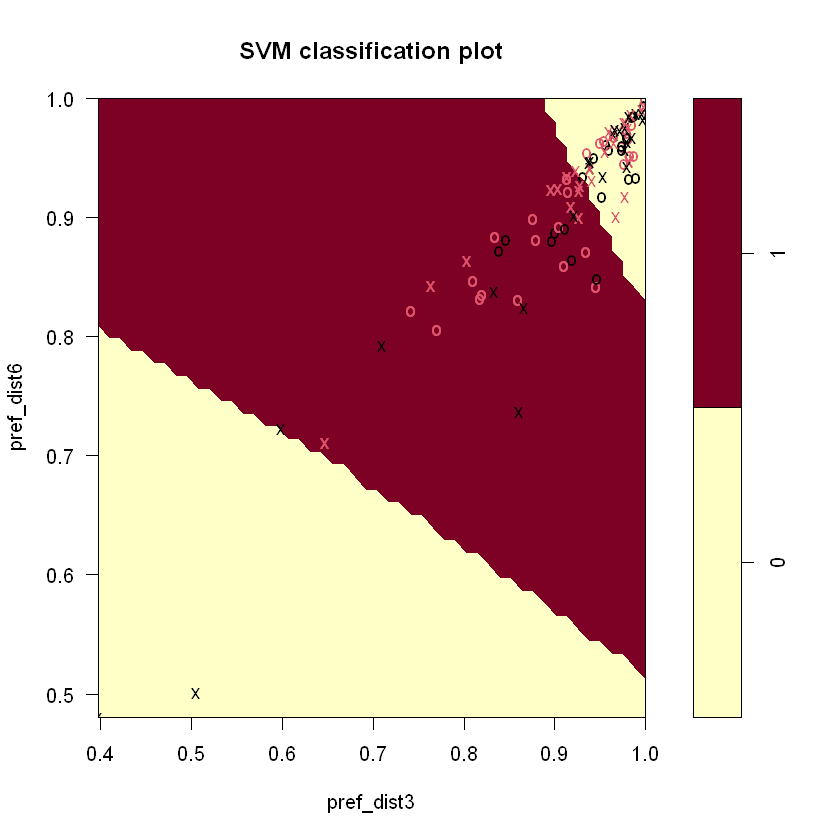

In [106]:
plot(sig_model2, data=df_test, pref_dist6 ~ pref_dist3, slice=list(artistPop=60, trackPop=80))